<a href="https://colab.research.google.com/github/gmehra123/PORTFOLIO/blob/main/Testing_notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural networks can replicate any function part 2 !!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch

In [4]:
X = torch.rand(size=(10000,2))
# Creating complex non linear dependent variable
y = torch.exp(X[:,0]) + X[:,1]**2+torch.sin(X[:,1])

In [5]:
y=y.unsqueeze(dim=1)

In [6]:
y.shape

torch.Size([10000, 1])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [44]:
# Creating the model
class MultiVarModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.ll1 = nn.Linear(in_features=2,out_features=8)
    self.ac1 = nn.ReLU()
    self.ll2 = nn.Linear(in_features=8,out_features=16)
    self.ac2 = nn.ReLU()
    self.ll3 = nn.Linear(in_features=16,out_features=16)
    self.ac3 = nn.ReLU()
    self.ll4 = nn.Linear(in_features=16,out_features=4)
    self.ac4 = nn.ReLU()
    self.output = nn.Linear(in_features=4,out_features=1)

  def forward(self,X):
    X = self.ll1(X)
    X = self.ac1(X)
    X = self.ll2(X)
    X = self.ac2(X)
    X = self.ll3(X)
    X = self.ac3(X)
    X = self.ll4(X)
    X = self.ac4(X)
    X = self.output(X)
    return X

In [45]:
model = MultiVarModel()

In [46]:
# Run untrained model
with torch.inference_mode():
  y_pred_untune = model(X_test)

In [47]:
loss_fn(y_pred_untune,y_test).item()

2.4781622886657715

In [48]:
y_pred_untune_np = y_pred_untune.numpy()
y_test1 = y_test.numpy()
y_pred_untune_np.shape,y_test1.shape

((2000, 1), (2000, 1))

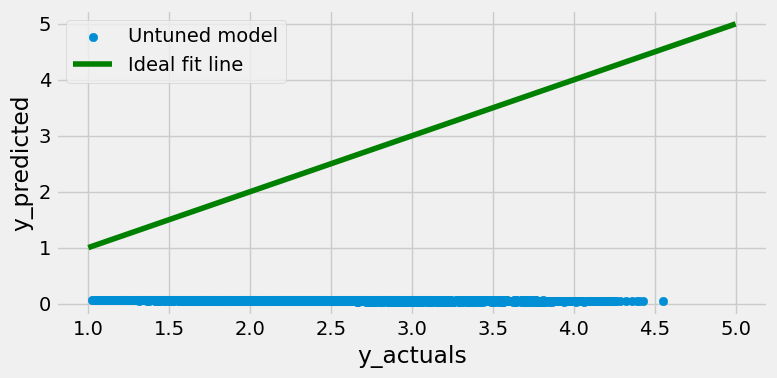

In [49]:
plt.style.use('fivethirtyeight')
x_a = np.linspace (1,5)
y_a = x_a
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(y_test1,y_pred_untune,label="Untuned model")
ax.plot(x_a,y_a,label="Ideal fit line",color='green',linewidth=4)
ax.set_xlabel('y_actuals')
ax.set_ylabel('y_predicted')
plt.legend()
plt.tight_layout()
plt.savefig('UnFitted_model.jpg')
plt.show()

### Define loss fn and optimizer

In [50]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params = model.parameters(),lr=0.01)

In [56]:
epochs = 100
for epoch in range(epochs):
  #1. Fwd pass
  y_pred_tr = model(X_train)

  #2. Calculate the loss
  loss_tr = loss_fn(y_pred_tr,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. bck prop
  loss_tr.backward()

  #5 Optimizer step
  optimizer.step()

  # Put model in evaluation mode
  model.eval()
  with torch.inference_mode():
    y_pred_test = model(X_test)
    loss_test = loss_fn(y_pred_test,y_test)

  if epoch % 10 ==0:
    print(f"epoch: {epoch} | loss_train: {loss_tr} | Loss_test: {loss_test}")

epoch: 0 | loss_train: 0.06235961243510246 | Loss_test: 0.06259709596633911
epoch: 10 | loss_train: 0.06000799685716629 | Loss_test: 0.06044001877307892
epoch: 20 | loss_train: 0.056780047714710236 | Loss_test: 0.057762615382671356
epoch: 30 | loss_train: 0.05508020147681236 | Loss_test: 0.05631757527589798
epoch: 40 | loss_train: 0.053688813000917435 | Loss_test: 0.054786887019872665
epoch: 50 | loss_train: 0.052641358226537704 | Loss_test: 0.05382935330271721
epoch: 60 | loss_train: 0.05148845911026001 | Loss_test: 0.05261710286140442
epoch: 70 | loss_train: 0.0504220612347126 | Loss_test: 0.051561389118433
epoch: 80 | loss_train: 0.049140311777591705 | Loss_test: 0.05026865005493164
epoch: 90 | loss_train: 0.04762944206595421 | Loss_test: 0.04866824671626091


In [57]:
# Run untrained model
with torch.inference_mode():
  y_pred_tune = model(X_test)

In [58]:
y_pred_tune_np = y_pred_tune.numpy()

In [59]:
y_pred_tr,y_train

(tensor([[3.1195],
         [2.5305],
         [2.8525],
         ...,
         [2.6842],
         [1.6567],
         [3.0025]], grad_fn=<AddmmBackward0>),
 tensor([[3.1466],
         [2.5816],
         [2.7748],
         ...,
         [2.7073],
         [1.6720],
         [2.9812]]))

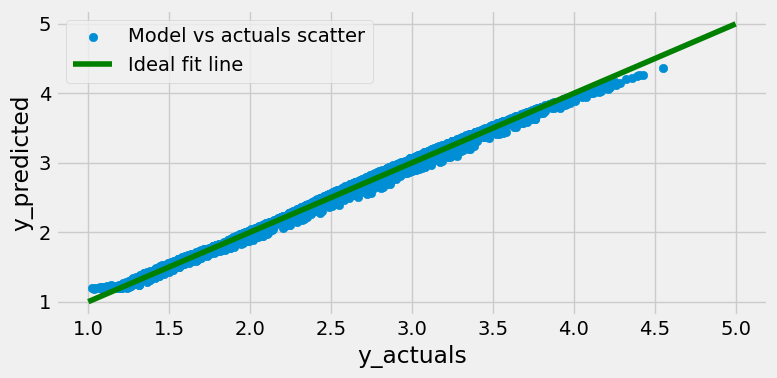

In [60]:
plt.style.use('fivethirtyeight')
x_a = np.linspace (1,5)
y_a = x_a
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(y_test1,y_pred_tune_np,label="Model vs actuals scatter")
ax.plot(x_a,y_a,label="Ideal fit line",color='green',linewidth=4)
ax.set_xlabel('y_actuals')
ax.set_ylabel('y_predicted')
plt.legend()
plt.tight_layout()
plt.savefig('Fitted_model.jpg')
plt.show()

In [61]:
AE = np.abs(y_test1)

In [62]:
# Saving the model
torch.save(model.state_dict(),f='models/model_non_linear.pth')

RuntimeError: Parent directory models does not exist.

In [ ]:
import pandas as pd
pred_vs_actuals_df = pd.DataFrame({'Actuals':y_test1.squeeze(),'Predictions':y_pred_tune.squeeze()})

In [ ]:
pred_vs_actuals_df['error'] = np.abs(pred_vs_actuals_df['Actuals'] - pred_vs_actuals_df['Predictions'])/pred_vs_actuals_df['Actuals']

In [ ]:
# top 10 best predictions
pred_vs_actuals_df.sort_values(by='error').head(10)

,Actuals,Predictions,error
1761,3.334318,3.334243,0.000023
1186,2.767747,2.767527,0.000079
312,3.265607,3.265276,0.000101
1069,1.775962,1.776288,0.000184
1601,1.671166,1.670814,0.000211
1937,1.620062,1.620444,0.000236
1591,3.600719,3.601706,0.000274
304,2.809593,2.808769,0.000294
1421,1.931010,1.930402,0.000315
247,2.850923,2.851884,0.000337


In [ ]:
# Worst predictions
pred_vs_actuals_df.sort_values(by='error',ascending=False).head(10)

,Actuals,Predictions,error
1509,1.962809,1.718266,0.124588
1818,2.016922,1.769820,0.122514
1841,2.045218,1.808161,0.115908
324,1.959105,1.734512,0.114641
589,2.001009,1.777625,0.111636
197,2.028678,1.810122,0.107733
1062,2.068960,1.846815,0.107370
523,1.623246,1.454175,0.104156
1300,2.097412,1.881478,0.102953
456,2.138384,1.918548,0.102805
